In [72]:
import pandas as pd 

df = pd.read_csv("DATA/housing.csv")


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [74]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


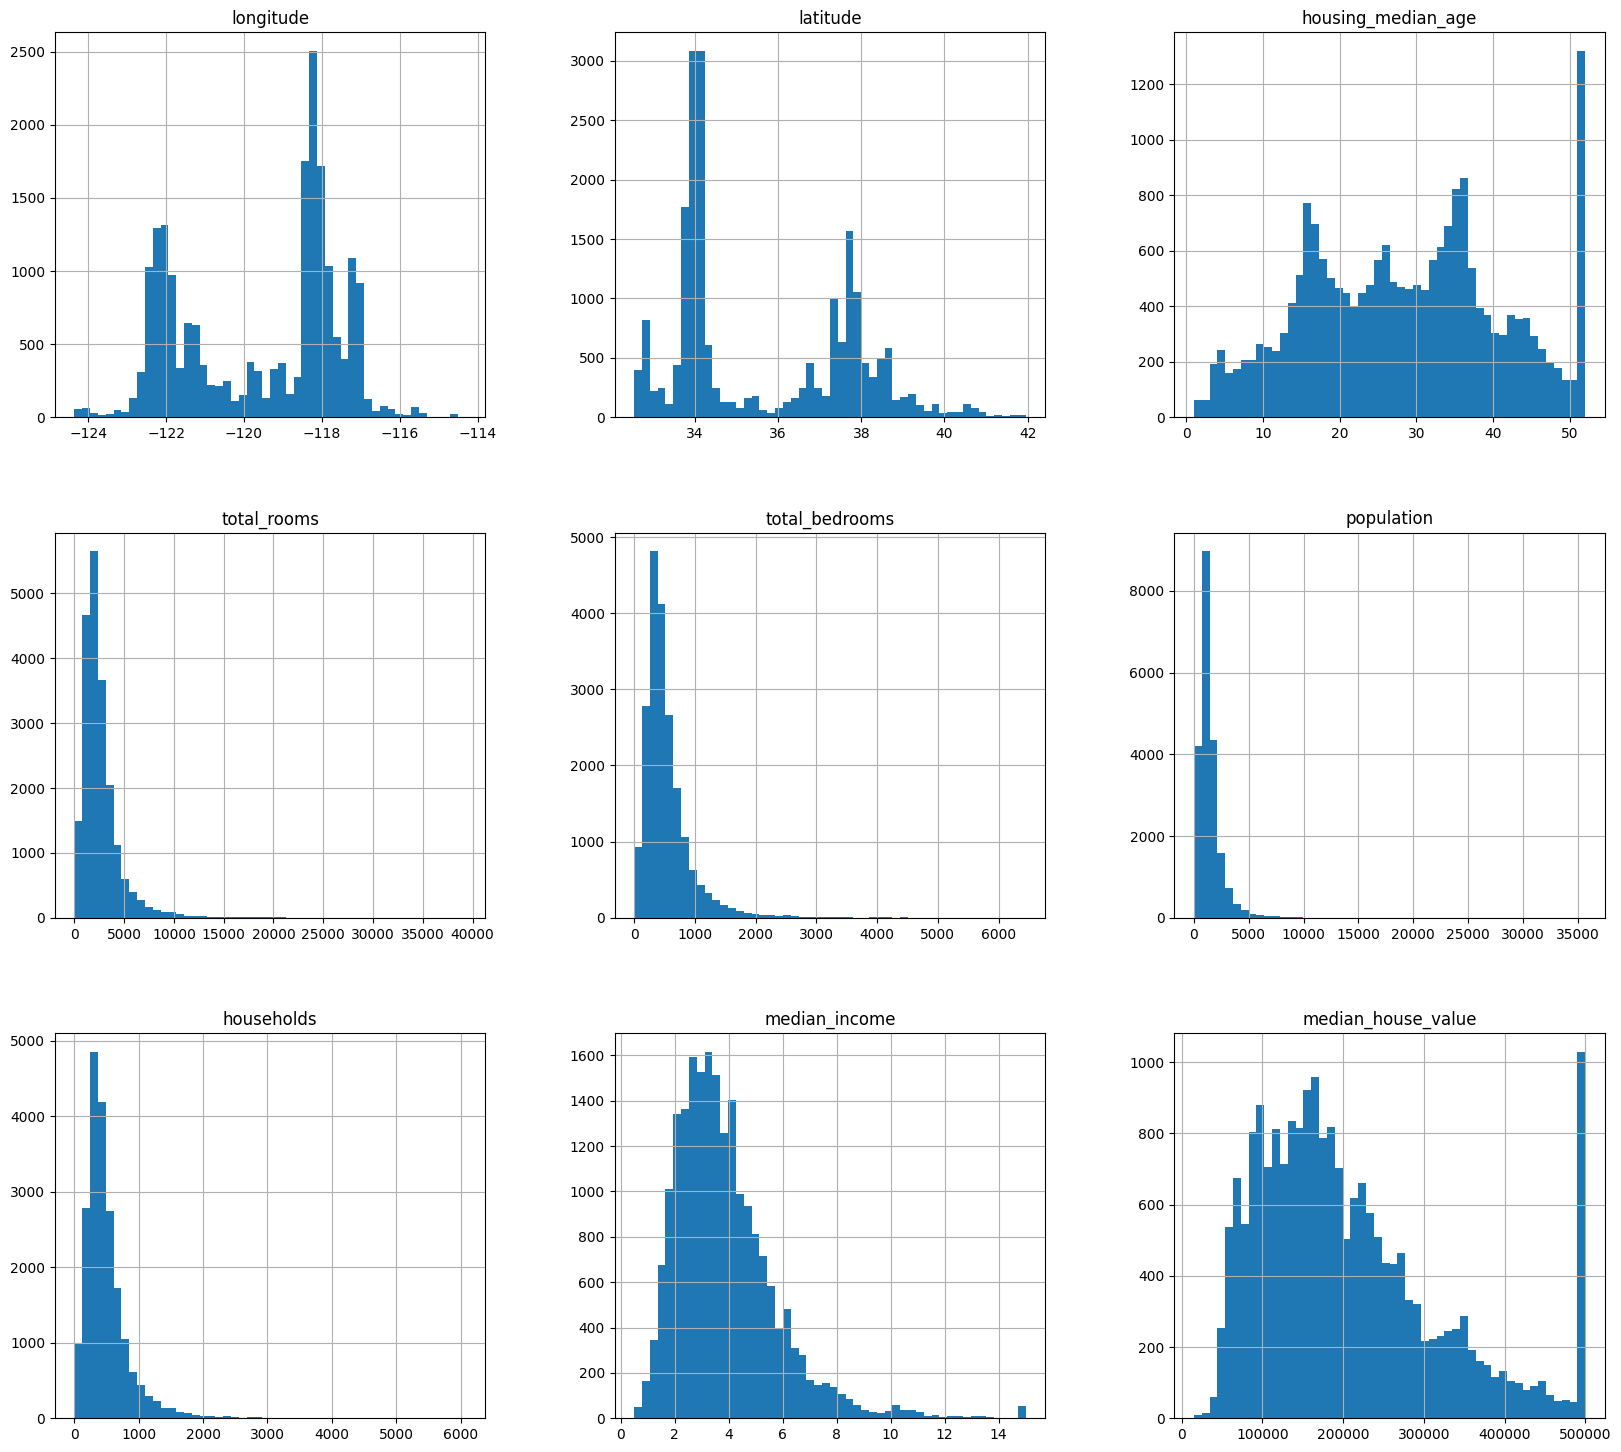

In [75]:
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,18))
plt.show()

In [76]:
import numpy as np 

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)

In [77]:
print(len(train_set))
print(len(test_set))

16512
4128


In [78]:
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id, test_ratio))
#     return data.iloc[~in_test_set], data.iloc[in_test_set]

# import hashlib

# def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#     return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

# housing_with_id = df.reset_index()
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [79]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12437,-116.17,33.66,22.0,639.0,203.0,664.0,153.0,1.9306,47500.0,INLAND
4976,-118.28,34.00,48.0,1514.0,376.0,1353.0,344.0,2.1607,96100.0,<1H OCEAN
19171,-122.66,38.44,17.0,5815.0,898.0,2614.0,887.0,4.3657,215900.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND
908,-122.00,37.54,29.0,4133.0,744.0,2023.0,749.0,5.1616,275100.0,<1H OCEAN


In [80]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: >

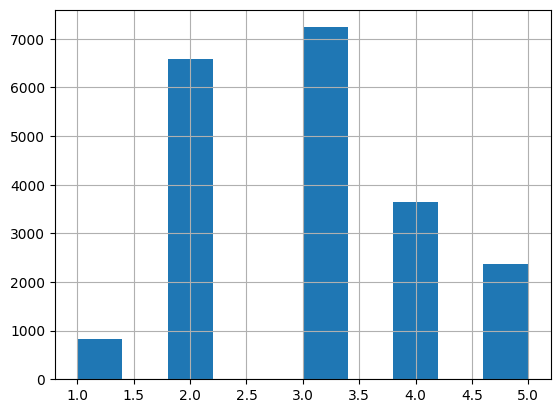

In [81]:
df['income_cat'] = pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6., np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist()

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    start_train_set = df.loc[train_index]
    start_test_set = df.loc[test_index]

In [83]:
start_test_set['income_cat'].value_counts() / len(start_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [84]:
for set_ in (start_train_set, start_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [85]:
df = start_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

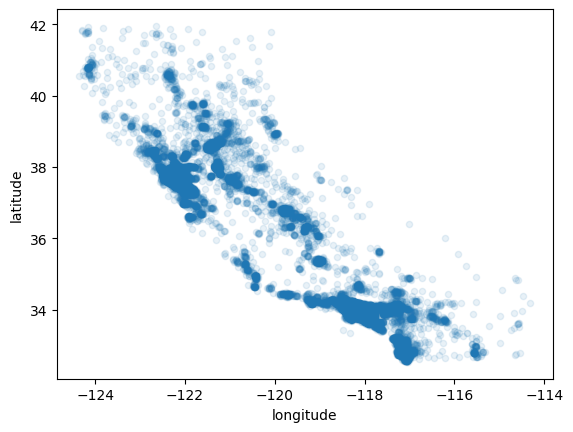

In [86]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

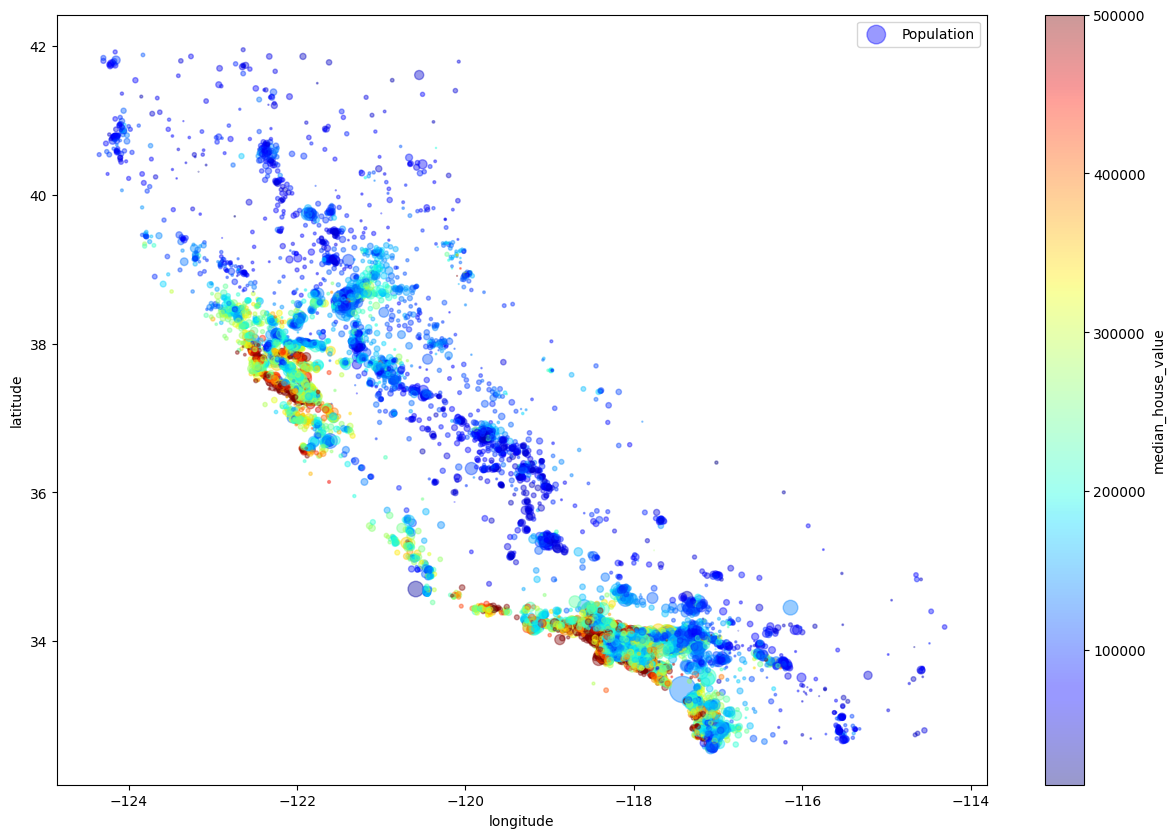

In [87]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="Population", figsize=(15,10), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [88]:
# corr_matrix = df.corr()
# # corr_matrix["median_houe_value"].sor_values(ascending=False)

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

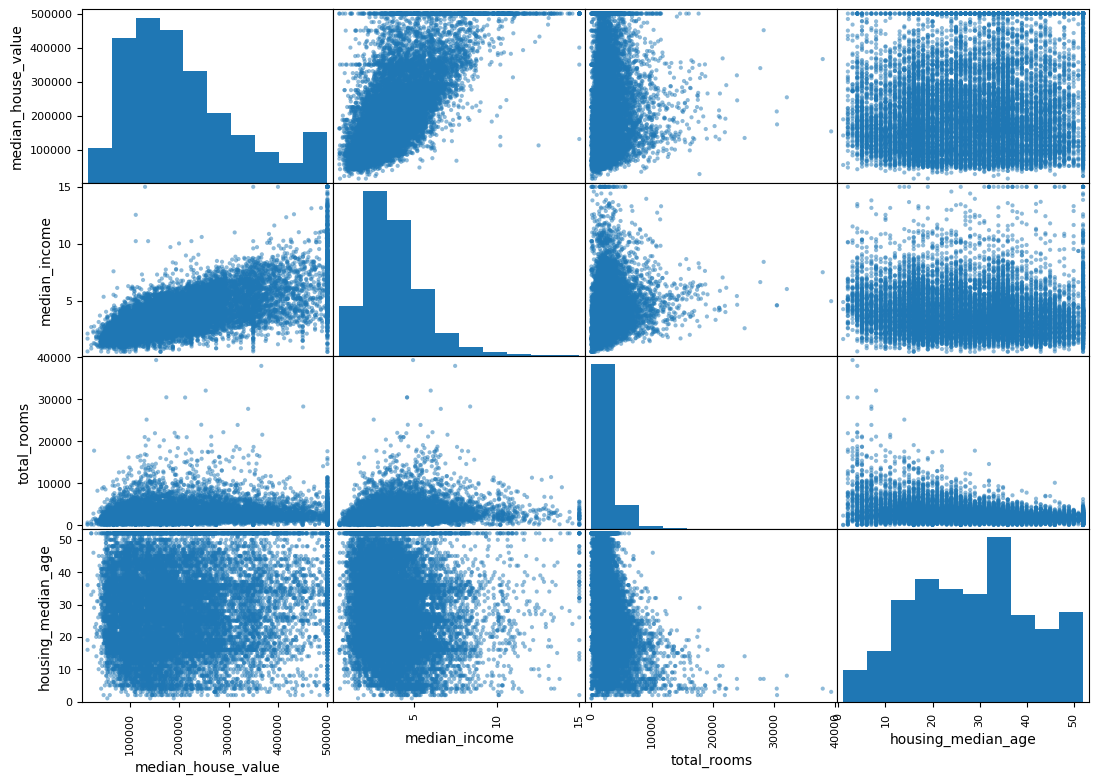

In [89]:
from pandas.plotting import scatter_matrix

att = ["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(df[att], figsize=(13,9))

<Axes: xlabel='median_income', ylabel='median_house_value'>

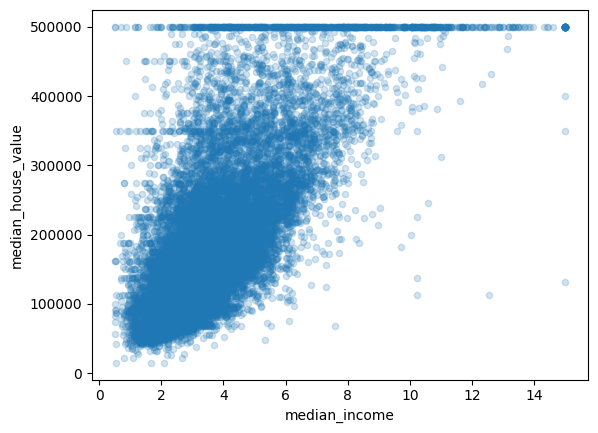

In [90]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

In [91]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

In [92]:
housing = start_train_set.drop(['median_house_value'], axis=1)
housing_labels = start_train_set['median_house_value'].copy()

In [93]:
# fill misiing value with median

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [95]:
housing_num = housing.drop("ocean_proximity", axis=1)


In [96]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [97]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [98]:
X = imputer.transform(housing_num)

In [99]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [100]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(20)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [101]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [102]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:20]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.]])

In [103]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [104]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot 

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [105]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [106]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class combinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_perr_room = True):
        self.add_bedrooms_perr_room = add_bedrooms_perr_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, bedrooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_perr_room:
            bedrooms_pr_room = X[:, bedrooms_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_pr_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = combinedAttributeAdder(add_bedrooms_perr_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', combinedAttributeAdder()),
    ('std_scaler', StandardScaler()),
])

# housing_num_tr = num_pipeline.fit_transform(housing_num)


In [109]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [110]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression()

In [111]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions :", lr.predict(some_data_prepared))

Predictions : [ 86327.32120462 306269.39222521 151686.37104253 186320.19298729
 244575.9553263 ]


In [112]:
print("Labels : ", list(some_labels))

Labels :  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [113]:
from sklearn.metrics import mean_squared_error
housing_prediction = lr.predict(housing_prepared)
lr_mse = mean_squared_error(housing_labels, housing_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

68789.58126449553

In [114]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [115]:
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [116]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [117]:
def diplay_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

diplay_scores(tree_rmse_scores)

Scores :  [73659.08851583 72006.67417642 68962.25231688 70163.3193277
 67618.10693792 75484.79963747 74880.25458449 71259.16020717
 71302.02665515 71977.13540001]
Mean :  71731.28177590374
Standard Deviation :  2351.7875383966634


In [118]:
lr_scores = cross_val_score(lr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)
diplay_scores(lr_rmse_scores)

Scores :  [71801.99837884 65015.07583697 67659.2906864  68787.85200499
 67026.6711897  72547.86158248 75116.24236759 68966.54738073
 66561.96285809 70397.64938435]
Mean :  69388.11516701337
Standard Deviation :  2930.1079671665093


In [119]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [120]:
forest_mse = mean_squared_error(housing_labels, housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [121]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
diplay_scores(forest_rmse_scores)

Scores :  [51730.91063762 49963.09123811 47015.57486957 52390.1624237
 48148.93936442 51696.46146387 52747.20267424 49850.84239083
 48350.31148574 54676.45148935]
Mean :  50656.99480374418
Standard Deviation :  2275.1947206444956


In [122]:
# Model Saving 
import joblib

joblib.dump(forest_reg, "my_model.pkl")

['my_model.pkl']

In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [124]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [125]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [126]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

64277.338683186936 {'max_features': 2, 'n_estimators': 3}
55425.11992544823 {'max_features': 2, 'n_estimators': 10}
52471.447860142136 {'max_features': 2, 'n_estimators': 30}
61023.00207415714 {'max_features': 4, 'n_estimators': 3}
52523.84685338841 {'max_features': 4, 'n_estimators': 10}
50399.90575858089 {'max_features': 4, 'n_estimators': 30}
60106.841876206745 {'max_features': 6, 'n_estimators': 3}
51536.47990522728 {'max_features': 6, 'n_estimators': 10}
49844.80951324701 {'max_features': 6, 'n_estimators': 30}
59607.86120926867 {'max_features': 8, 'n_estimators': 3}
52028.662373398336 {'max_features': 8, 'n_estimators': 10}
50033.71915821599 {'max_features': 8, 'n_estimators': 30}
62624.98674021693 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54424.54088690169 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59731.6155226255 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52617.240231023316 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [127]:
feature_imp = grid_search.best_estimator_.feature_importances_
feature_imp

array([7.83304445e-02, 7.87428357e-02, 4.15572011e-02, 1.99453048e-02,
       1.60968971e-02, 1.66891092e-02, 1.62167170e-02, 3.36015578e-01,
       2.36751425e-02, 1.12716474e-01, 8.73482972e-02, 1.05511402e-02,
       1.56523464e-01, 3.47923659e-05, 2.19212762e-03, 3.36447426e-03])

In [128]:
extra_att = ["rooms_per_hhold", "pop_per_hhold", "bedroom_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attr = list(cat_encoder.categories_[0])
attr = num_attribs + extra_att + cat_one_hot_attr
sorted(zip(feature_imp,attr), reverse=False)

[(3.479236585059082e-05, 'ISLAND'),
 (0.002192127618988575, 'NEAR BAY'),
 (0.003364474257107165, 'NEAR OCEAN'),
 (0.010551140200942076, '<1H OCEAN'),
 (0.016096897138180015, 'total_bedrooms'),
 (0.01621671701705303, 'households'),
 (0.01668910923894708, 'population'),
 (0.019945304790547624, 'total_rooms'),
 (0.023675142488685363, 'rooms_per_hhold'),
 (0.04155720106166539, 'housing_median_age'),
 (0.07833044451574288, 'longitude'),
 (0.07874283565810478, 'latitude'),
 (0.08734829716107753, 'bedroom_per_room'),
 (0.11271647402084602, 'pop_per_hhold'),
 (0.15652346416523294, 'INLAND'),
 (0.33601557830102896, 'median_income')]

In [129]:
final_model = grid_search.best_estimator_

X_test = start_test_set.drop("median_house_value", axis=1)
y_test = start_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predications = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predications)
final_rmse = np.sqrt(final_mse)

In [130]:
final_rmse

47626.335023495856

In [131]:
from scipy import stats
confidence = 0.95
squared_error = (final_predications - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_error)-1, loc=squared_error.mean(),scale=stats.sem(squared_error)))

array([45634.88204092, 49537.79483033])